# Week 3 CNN Cancer Detection Kaggle Mini-Project
This is my project for the Deep Learning course focused on convolutional neural networks. You can find more info on GiHub on my profile [here](https://github.com/rorrostieta/KaggleCancerDetection). I'll be following the rubric given to create this project and guide you through my proces for the competition.

The data can be found on Kaggle on the competition [Histopathologic Cancer Detection](https://www.kaggle.com/c/histopathologic-cancer-detection/) you can go there and look for more details to participate on the competition.

## Problem
In this competition we're given a series of small images or snippets from pathology scans, each of this scans may contain some cancerous tissue within them. Our goal is to create a model which identifies the presence of cancerous tissue within the images, since we're not doctors or specialists with the domain knowledge, the data provided to train the model is labelled where if there is an area of the image which contains cancerous tissue it is identified with a number 1.

## Exploratory Data Analysis
I'll be doing some basic EDA just to see if the data provided could be cleaned out and see how it is labeled.

In [22]:
import pandas as pd
import numpy as np
from PIL import Image

# Importing the Data
df = pd.read_csv('./data/train_labels.csv')

In [23]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


% Positive Cases: 40.5
% Nevative Cases: 59.5


<AxesSubplot:>

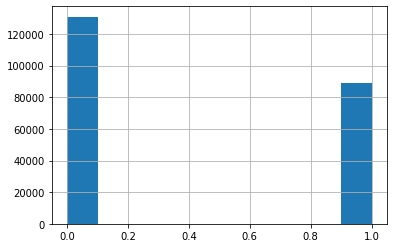

In [42]:
# Histogram to label distribution
pos_percent = round(df['label'].sum()/len(df['label'])*100, 2)
neg_percent = 100 - pos_percent
print('% Positive Cases:',pos_percent)
print('% Nevative Cases:',neg_percent)
df['label'].hist()

Sample Img


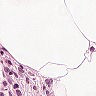

Image size: (96, 96)
Image as array shape: (96, 96, 3)


In [37]:
# Extracting a file to identify the structure
eda_file = df['id'][0]
file_path = './data/train/' + eda_file + '.tif'
im = Image.open(file_path)

print('Sample Img')
display(im)
print('Image size:',im.size)

# Converting in to an array
imarray = np.array(im)
print('Image as array shape:',imarray.shape)
# print(imarray)

### EDA Results
The results from the EDA we show that we have 220,025 entries with a 60/40 negative positive ratio respectively, this is useful since we have a good amount of examples to train the model.

Each of the entry has an **id** corresponding to an image within the data set provided. This images are of size 96x96 pixels and when we transform these into arrays we can obtain the three planes RGB.